In [2]:
import pandas as pd
import re

# 1️ Cargar el CSV
df = pd.read_csv('Tweets.csv', encoding='latin-1')

# 2️ Mostrar los nombres de las columnas (para verificar)
print("Columnas del CSV:", df.columns.tolist())

# 3️ Función para limpiar texto
def remove_especial_text(row):
    if isinstance(row, str):  # Verifica que sea texto
        # Eliminar números
        row = re.sub(r'\d+', '', row)
        # Eliminar signos de puntuación y símbolos especiales
        row = re.sub(r'[^\w\s]', '', row)
        # Pasar todo a minúsculas
        row = row.lower()
        # Quitar espacios extra
        row = ' '.join(row.split())
        return row
    else:
        return ""  # Si el valor no es texto

# 4️ Aplicar la función a la columna 'text'
df["processed_text"] = df["text"].apply(remove_especial_text)

# 5️ Mostrar una vista previa de los resultados
df



Columnas del CSV: ['textID', 'text', 'selected_text', 'sentiment']


,textID,text,selected_text,sentiment,processed_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id have responded if i were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldnt they put them on the relea...
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish we could come see u on denver husband los...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,ive wondered about rake to the client has made...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good for both of you enjoy the break you p...
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,but it was worth it


In [5]:
df["tokenization"] = df["processed_text"].str.split(" ")
df[["tokenization"]]

,tokenization
0,"[id, have, responded, if, i, were, going]"
1,"[sooo, sad, i, will, miss, you, here, in, san,..."
2,"[my, boss, is, bullying, me]"
3,"[what, interview, leave, me, alone]"
4,"[sons, of, why, couldnt, they, put, them, on, ..."
...,...
27476,"[wish, we, could, come, see, u, on, denver, hu..."
27477,"[ive, wondered, about, rake, to, the, client, ..."
27478,"[yay, good, for, both, of, you, enjoy, the, br..."
27479,"[but, it, was, worth, it]"


## AGREGAR LEMATIZAR

pip install spacy - modelo

python -m spacy download es_core_news_sm --modelo en ingles para poder lematizar

In [3]:
import spacy

# 2️ Cargar modelo spaCy en español
nlp = spacy.load('es_core_news_sm')

# 3️ Función para limpiar texto
def remove_especial_text(row):
    if isinstance(row, str):
        row = re.sub(r'\d+', '', row)               # Eliminar números
        row = re.sub(r'[^\w\s]', '', row)           # Eliminar signos
        row = row.lower()                          # Minúsculas
        row = ' '.join(row.split())                # Espacios extra
        return row
    else:
        return ""

# 4️ Función para lematizar texto
def lemmatize_text(text):
    doc = nlp(text)
    lemas = [token.lemma_ for token in doc]
    return ' '.join(lemas)

# 5️ Aplicar preprocesamiento
df = pd.read_csv('Tweets.csv', encoding='latin-1')
df["processed_text"] = df["text"].apply(remove_especial_text)
df["lemmatized_text"] = df["processed_text"].apply(lemmatize_text)

# 6️ Ver algunos resultados
df

,textID,text,selected_text,sentiment,processed_text,lemmatized_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id have responded if i were going,id have responded if i were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,my boss is bullying yo
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,what interview leave yo alonir
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldnt they put them on the relea...,sons of why couldnt they put them on the releá...
...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish we could come see u on denver husband los...,wish we could come see u on denver husband los...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,ive wondered about rake to the client has made...,ive wondered about rakir to the client has mad...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good for both of you enjoy the break you p...,yay good for both of you enjoy the break you p...
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,but it was worth it,but it was worth it


## Nube de palabras

Index(['textID', 'text', 'selected_text', 'sentiment', 'processed_text'], dtype='object')


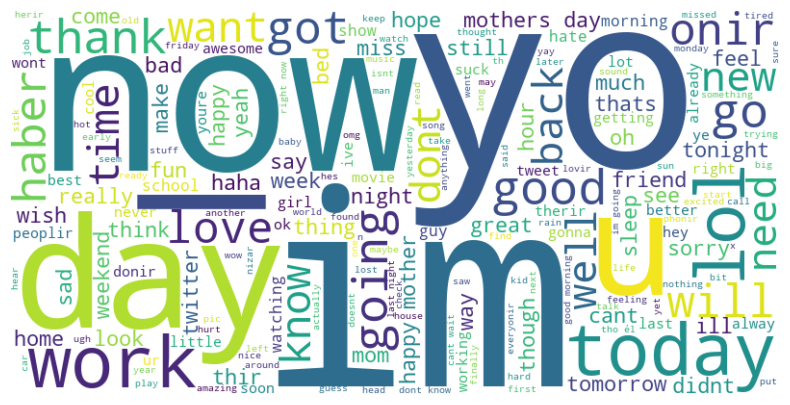

In [8]:
# 1. Verifica las columnas actuales
print(df.columns)

# 2. Si no existe 'lemmatized_text', crea la columna:
df["lemmatized_text"] = df["processed_text"].apply(lemmatize_text)

# 3. Genera la nube de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join(df['lemmatized_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Entrenamiento de Modelo

Columnas: ['textID', 'text', 'selected_text', 'sentiment', 'processed_text', 'lemmatized_text']
Clases de sentiment (ejemplos): sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64
Mapping etiquetas -> números: {'negative': 0, 'neutral': 1, 'positive': 2}

Entrenando LogisticRegression ...
LogisticRegression -> Accuracy: 0.6853  Precision: 0.6997  Recall: 0.6853  F1: 0.6862

Classification report:
              precision    recall  f1-score   support

    negative       0.72      0.60      0.66      1556
     neutral       0.61      0.75      0.67      2224
    positive       0.80      0.67      0.73      1717

    accuracy                           0.69      5497
   macro avg       0.71      0.68      0.69      5497
weighted avg       0.70      0.69      0.69      5497


Entrenando MultinomialNB ...
MultinomialNB -> Accuracy: 0.6396  Precision: 0.6785  Recall: 0.6396  F1: 0.6372

Classification report:
              precision    recall  f1-score   

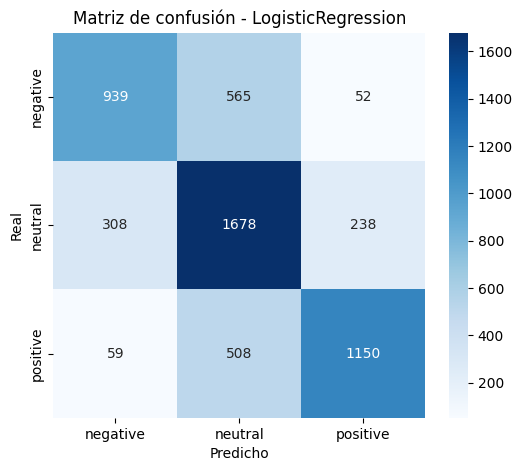

Predicciones guardadas en 'predicciones_sentimiento_test.csv'


In [4]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0) Datos (ya tienes df) ---
# Si necesitas recargar:
# df = pd.read_csv('Tweets.csv', encoding='latin-1')

print("Columnas:", df.columns.tolist())
print("Clases de sentiment (ejemplos):", df['sentiment'].value_counts())

# --- 1) Preparar X e y ---
X = df['lemmatized_text'].fillna('')   # texto lematizado
y = df['sentiment'].fillna('neutral')  # por si hay nulos

# --- 2) Codificar etiquetas (texto -> números) ---
le = LabelEncoder()
y_enc = le.fit_transform(y)
print("Mapping etiquetas -> números:", dict(zip(le.classes_, range(len(le.classes_)))))

# --- 3) Dividir en train/test (estratificando por clase) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# --- 4) Vectorizar texto (TF-IDF) ---
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# -----------------------------
# Opcional: probar dos modelos y comparar
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "MultinomialNB": MultinomialNB()
}

results = {}
for name, model in models.items():
    print(f"\nEntrenando {name} ...")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"{name} -> Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

    # Guardar resultados para comparar
    results[name] = {"model": model, "y_pred": y_pred, "metrics": (acc, prec, rec, f1)}

# --- 5) Matriz de confusión (para el mejor modelo; aquí ejemplo con LogisticRegression) ---
best_name = max(results, key=lambda k: results[k]["metrics"][3])  # elegir por F1
best_pred = results[best_name]["y_pred"]
print(f"\nMejor modelo según F1: {best_name}")

cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title(f'Matriz de confusión - {best_name}')
plt.show()

# --- 6) Guardar predicciones (opcional) ---
df_test = pd.DataFrame({
    "text": X_test,
    "true_label": le.inverse_transform(y_test),
    "predicted_label": le.inverse_transform(best_pred)
})
df_test.to_csv("predicciones_sentimiento_test.csv", index=False)
print("Predicciones guardadas en 'predicciones_sentimiento_test.csv'")


6. Tokenizacion

In [6]:
import pandas as pd, re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Cargar el dataset
df = pd.read_csv('Tweets.csv', encoding='latin-1')

# Limpieza del texto
def remove_especial_text(row):
    if isinstance(row, str):
        row = re.sub(r'\d+', '', row)
        row = re.sub(r'[^\w\s]', '', row)
        row = row.lower()
        row = ' '.join(row.split())
        return row
    else:
        return ""

df["processed_text"] = df["text"].apply(remove_especial_text)

# Dividir en datos de entrenamiento y prueba
X = df["processed_text"]
y = df["sentiment"]
  # Cambia el nombre si tu columna de sentimiento tiene otro nombre
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Entrenamiento del modelo Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predicción
y_pred = model.predict(X_test_tfidf)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("=== MÉTRICAS DEL MODELO ===")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\n=== REPORTE DETALLADO ===")
print(classification_report(y_test, y_pred))


=== MÉTRICAS DEL MODELO ===
Accuracy: 0.63
Precision: 0.65
Recall: 0.63
F1-score: 0.63

=== REPORTE DETALLADO ===
              precision    recall  f1-score   support

    negative       0.72      0.49      0.59      1562
     neutral       0.56      0.75      0.64      2230
    positive       0.71      0.61      0.66      1705

    accuracy                           0.63      5497
   macro avg       0.67      0.62      0.63      5497
weighted avg       0.65      0.63      0.63      5497



In [7]:
print(df.columns)


Index(['textID', 'text', 'selected_text', 'sentiment', 'processed_text'], dtype='object')
